Original Audio:


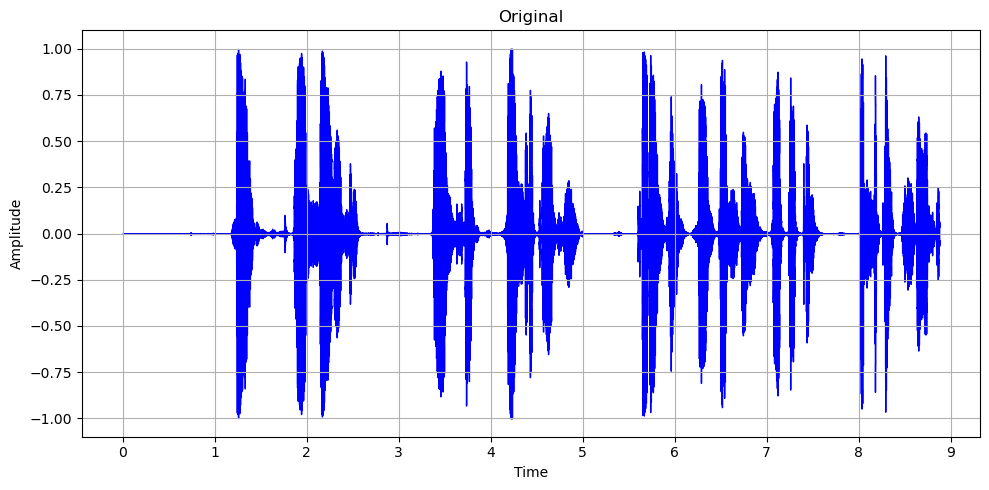

Trimmed Audio:


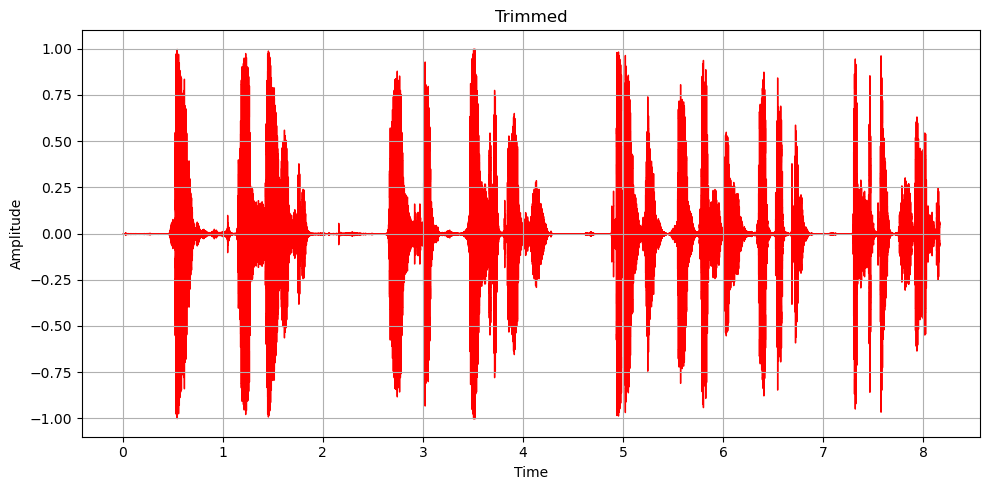

In [16]:
#A1

import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

audio_orig, sr_orig = librosa.load('devendra.wav', sr=None)
audio_trimmed, index_trimmed = librosa.effects.trim(audio_orig)
sf.write('trimmed_audio.wav', audio_trimmed, sr_orig)
audio_trimmed_loaded, sr_trimmed_loaded = librosa.load('trimmed_audio.wav', sr=None)

print("Original Audio:")
ipd.display(ipd.Audio(audio_orig, rate=sr_orig))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio_orig, sr=sr_orig, color='blue')
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Trimmed Audio:")
ipd.display(ipd.Audio(audio_trimmed, rate=sr_orig))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio_trimmed_loaded, sr=sr_trimmed_loaded, color='red')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

Splitting with top_db=1


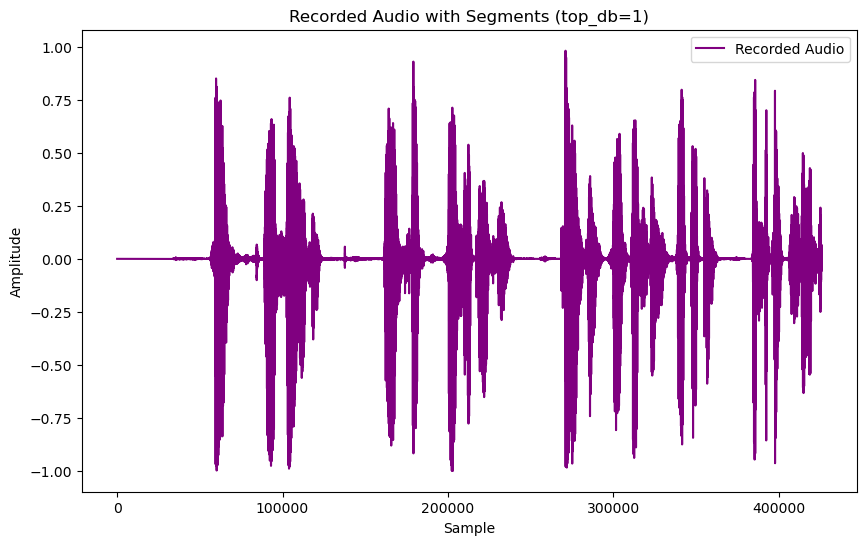

Splitting with top_db=10


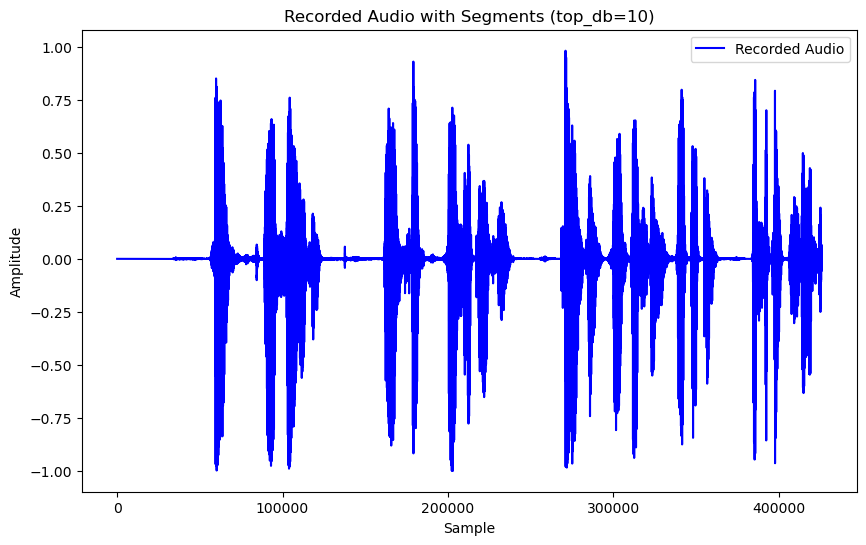

Splitting with top_db=20


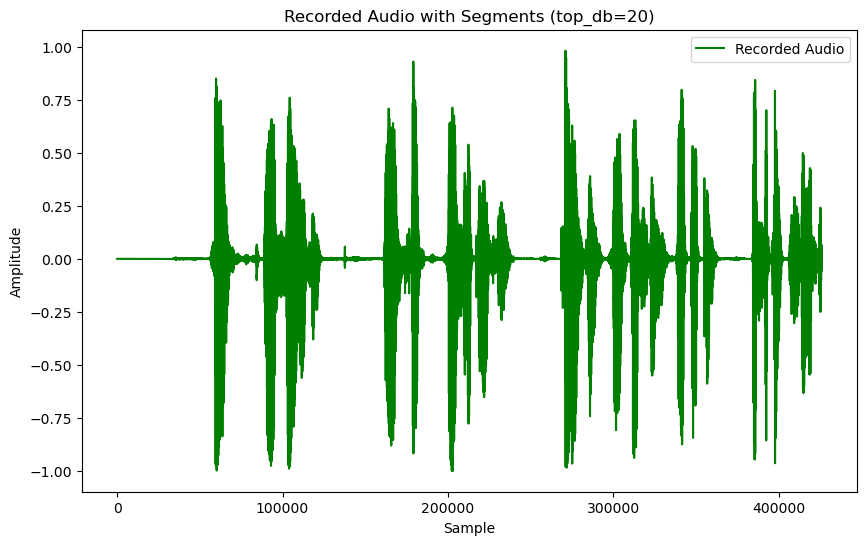

Splitting with top_db=40


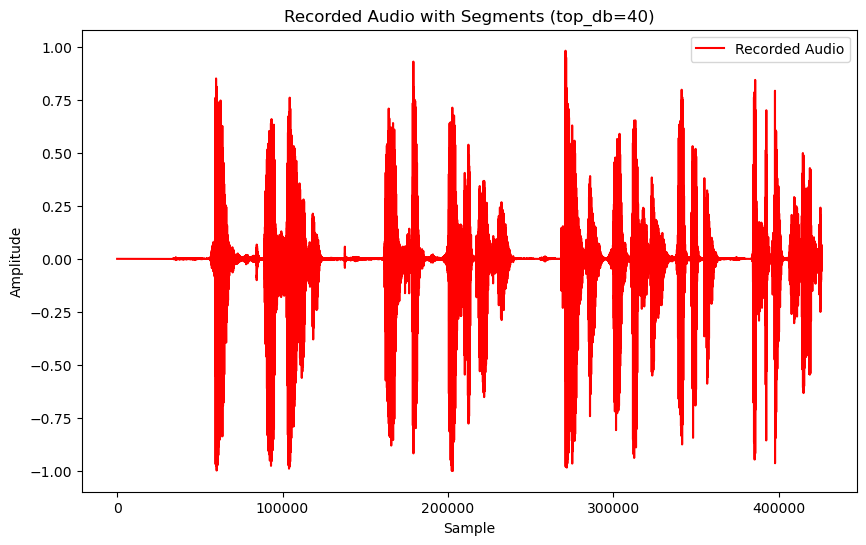

Listening to segments with top_db=1:


Listening to segments with top_db=10:


Listening to segments with top_db=20:


Listening to segments with top_db=40:


In [22]:
import librosa
import soundfile as sf
import IPython.display as ipd
import random
import matplotlib.pyplot as plt

recorded_audio, sample_rate = librosa.load('devendra.wav', sr=None)

def split_and_save(top_db):
    segments = librosa.effects.split(recorded_audio, top_db=top_db)
    segment_colors = ['red', 'blue', 'green', 'purple']
    plt.figure(figsize=(10, 6))
    plt.plot(recorded_audio, color=random.choice(segment_colors), label='Recorded Audio')

    for i, segment in enumerate(segments):
        start, end = segment
        segment_audio = recorded_audio[start:end]
        sf.write(f'segment_{i}.wav', segment_audio, sample_rate)

    plt.title(f"Recorded Audio with Segments (top_db={top_db})")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

top_db_values = [1, 10, 20, 40]

for top_db in top_db_values:
    print(f"Splitting with top_db={top_db}")
    split_and_save(top_db)

for i in range(len(top_db_values)):
    print(f"Listening to segments with top_db={top_db_values[i]}:")
    ipd.display(ipd.Audio(f'segment_{i}.wav'))

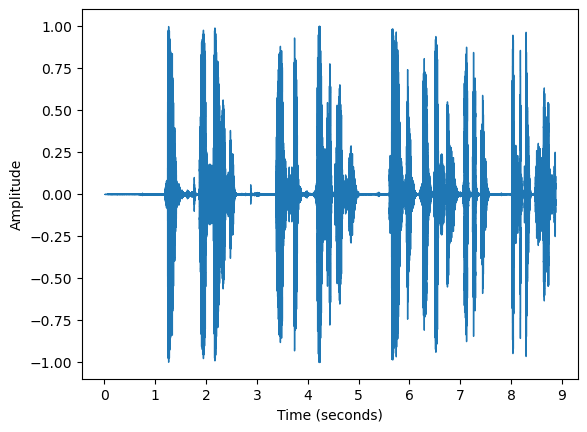

Shape of STFT result: (1025, 417)
Max absolute value in spectrogram: 80.0


In [23]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio_signal, sample_rate = librosa.load("devendra.wav", sr=None)

plt.figure()
librosa.display.waveshow(y=audio_signal, sr=sample_rate) 
plt.xlabel("Time (seconds)") 
plt.ylabel("Amplitude") 
plt.show()

n_fft = 2048
stft_result = librosa.stft(audio_signal, n_fft=n_fft, hop_length=n_fft//2)
print("Shape of STFT result:", stft_result.shape)

spectrogram = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max) 
max_abs_value = np.max(np.abs(spectrogram))
print("Max absolute value in spectrogram:", max_abs_value)

In [24]:
no_mute = librosa.effects.split(signal)
no_mute

array([[ 34304,  52224],
       [ 55808, 242176],
       [255488, 262656],
       [267776, 377856],
       [383488, 425984]])

In [25]:
def displayTime(startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))
for i in no_mute:
    displayTime(i[0],i[1])

 start time: 0.7146666666666667, end time: 1.088
 start time: 1.1626666666666667, end time: 5.045333333333334
 start time: 5.322666666666667, end time: 5.472
 start time: 5.578666666666667, end time: 7.872
 start time: 7.989333333333334, end time: 8.874666666666666


 start time: 0.7146666666666667, end time: 1.088
 start time: 1.1626666666666667, end time: 5.045333333333334
 start time: 5.322666666666667, end time: 5.472
 start time: 5.578666666666667, end time: 7.872
 start time: 7.989333333333334, end time: 8.874666666666666


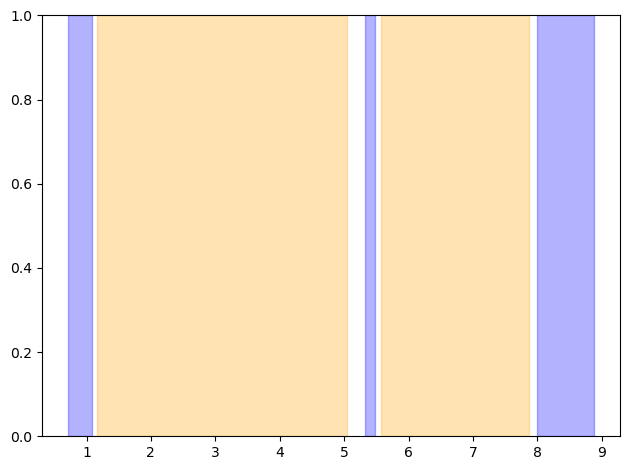

In [26]:
for i, (start, end) in enumerate(no_mute):
    displayTime(start, end)
    if i % 2 == 0:
        plt.axvspan(start/sr, end/sr, color='blue', alpha=0.3)  # Plot silence segments in blue
    else:
        plt.axvspan(start/sr, end/sr, color='orange', alpha=0.3)  # Plot non-silence segments in orange

plt.tight_layout()
plt.show()

C:\Users\deven\AppData\Local\Temp\ipykernel_22520\760069857.py:4: RuntimeWarning: divide by zero encountered in log10
  signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)


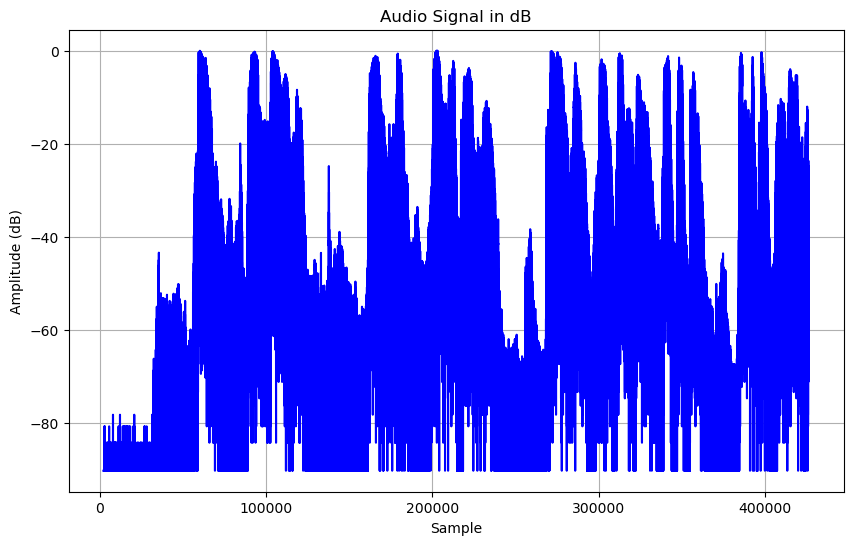

In [27]:
max_amplitude = np.max(np.abs(signal))

# Convert amplitude to dB
signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)

# Plot the dB representation of the signal
plt.figure(figsize=(10, 6))
plt.plot(signal_db, color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Signal in dB')
plt.grid(True)
plt.show()